In [1]:
import skeleton as s
import numpy as np
import matplotlib.pyplot as plt

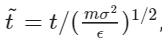

v^~ ->
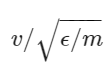

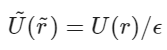

Kinetic energy in natural units:
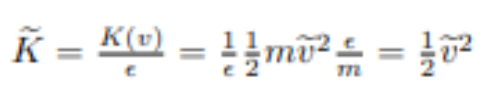

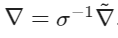

In [2]:
L = 1   #System is of size LxL with the origin at the center. The units of L are of 1/s
init_pos = np.array([[0.1, 0.8],[0.2, 0.9]])
init_vel = np.random.uniform(low=-1, high=1, size=(2, 2))
e =  1.65 * pow(10,-21)
s =  3.405 * pow(10,-10)
time_step = 0.001
m =  6.6335 * pow(10, -26) #mass of argon atom in kg
n = 2   #number of particles
number_of_steps = 100

In [3]:
print("initial pos\n", init_pos,"\n initial vel\n" ,init_vel)
times = np.arange(0,(number_of_steps + 1) * time_step, time_step)
times

initial pos
 [[0.1 0.8]
 [0.2 0.9]] 
 initial vel
 [[-0.20522908 -0.06671575]
 [ 0.0881275   0.42910243]]


array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [4]:
#compute the forces on the particles at each timestep, pos = [m]/[s] = 
def lj_force(position, n):
    F = 0
    pos = position[:,-n:]
    for j in range(n):
        f = 0    # force on the j-th particle
        for i in range(n-1):
            if i+j+1 >= n: #take into account particles 0,1,....,j-1
                rel_pos = pos[:,j+i+1-n]-pos[:,j] #gives position of i-th particle with resprect to j-th particle (points from i to j)
                r = np.linalg.norm(pos[:,j+i+1-n]-pos[:,j])
                f += rel_pos*((24/pow(r,2))*(pow(1/r,6))*((pow(1/r,6))-1))  # ff on the j-th part. from the interaction with the i-th part.
            else: #take into account particles j+1,....,n-1
                rel_pos=pos[:,j+i+1]-pos[:,j] #gives position of i-th particle with resprect to j-th particle (points from i to j)
                r = np.linalg.norm(pos[:,j+i+1]-pos[:,j])
                f += rel_pos*((24/pow(r,2))*(pow(1/r,6))*((pow(1/r,6))-1))  # f on the j-th part. from the interaction with the i-th part.
        if j == 0:
            F = f
        else:
            F = np.concatenate((F, f), axis=0, out=None)
    
    F_matrix = np.zeros((2,n)) #2 is the number of dimensions, n is the number of particles
    F_matrix[:n] = F[0:n]
    F_matrix[1:] = F[2:]
    return F_matrix

In [5]:
final_matrix_pos = np.copy(init_pos)
final_matrix_vel = np.copy(init_vel)

def euler(final_matrix_pos, final_matrix_vel):
    
    latest_pos = np.copy(final_matrix_pos[:,-2:])          #the -2 will eventually become -(number of particles)
    latest_vel = np.copy(final_matrix_vel[:,-2:])
    
    new_latest_pos = latest_pos + latest_vel * time_step
    new_latest_vel = latest_vel + lj_force(latest_pos, 2)
    return new_latest_pos, new_latest_vel


In [6]:
def kin_en(v,n): #v is the last step velocity and n the number of particles
    K = 0
    for i in range(n):
        K += 0.5*((v[0,i]*v[0,i])+(v[1,i]*v[1,i]))
    return K

In [7]:
def pot_en(position, n): #position is the matrix with all the positions stored in it, n is the number of particles
    U = 0;
    pos = position[:,-n:]
    for j in range(n):
        for i in range(n-1):
            if i+j+1 >= n: #take into account particles 0,1,....,j-1
                r = np.linalg.norm(pos[:,j+i+1-n]-pos[:,j])
                U += (4)*(pow(1/r,6))*((pow(1/r,6))-1)  # potnetial energy of the j-th part. from the interaction with the i-th part.
            else: #take into account particles j+1,....,n-1
                r = np.linalg.norm(pos[:,j+i+1]-pos[:,j])
                U += (4)*(pow(1/r,6))*((pow(1/r,6))-1)  # potential energy of the j-th part. from the interaction with the i-th part.
                
    return U

In [8]:
W = 1   #Width 
K = 1   #Depth
dimensions = 2
def atomic_distances(pos, L=1, W=1):
    rel_pos = pos[:, None, :] - pos[None, :, :]                 # returns one matrix for each particle. Relative distances within the box
    rel_dist = np.zeros((n, n, 1))
    for i in range(n):
        for k in range(n):
            for l in range(dimensions):
                if l == 0: # x-values i.e. change by L
                    rel_pos[i,k,l] = min(rel_pos[i,k,l], (rel_pos[i,k,l]+L)%L, (rel_pos[i,k,l]-L)%L, rel_pos[i,k,l]+L, rel_pos[i,k,l]-L, key=abs) # takes the smallest distance comparing all images
                if l == 1:
                    rel_pos[i,k,l] = min(rel_pos[i,k,l], (rel_pos[i,k,l]+W)%W, (rel_pos[i,k,l]-W)%W, rel_pos[i,k,l]+W, rel_pos[i,k,l]-W, key=abs)
                if l == 2:
                    rel_pos[i,k,l] = min(rel_pos[i,k,l], (rel_pos[i,k,l]+K)%K, (rel_pos[i,k,l]-K)%K, rel_pos[i,k,l]+K, rel_pos[i,k,l]-K, key=abs)
    for i in range(n):    
        for k in range(n):
            rel_dist[i,k] = np.sqrt(np.dot(rel_pos[i,k,:],rel_pos[i,k,:]))
            
    return rel_dist

[1.19232661e-01 1.52140475e+18 1.52140463e+18 1.52136188e+18
 1.51351017e+18 1.51339812e+18 1.58472076e+18 1.60494231e+18
 1.60493992e+18 1.60492829e+18 1.60133234e+18 1.59832285e+18
 1.59832262e+18 1.59101073e+18 1.64108334e+18 1.64117307e+18
 1.63489165e+18 1.63414550e+18 1.63414321e+18 1.64153776e+18
 1.64153775e+18 1.69197743e+18 1.69211297e+18 1.69211246e+18
 1.69211131e+18 1.68327623e+18 1.68664628e+18 1.68664509e+18
 1.68234921e+18 1.68242519e+18 1.68242394e+18 1.68242297e+18
 1.68240409e+18 1.68240410e+18 1.68343517e+18 1.68266011e+18
 1.68266980e+18 1.68262261e+18 1.68234790e+18 1.68234790e+18
 1.68230775e+18 1.66257198e+18 1.66257791e+18 1.66027940e+18
 1.66027939e+18 1.66027812e+18 1.65445136e+18 1.65050349e+18
 1.65011934e+18 1.64382910e+18 1.64587411e+18 1.62890229e+18
 1.61801410e+18 1.70809395e+18 1.70809362e+18 1.70809361e+18
 1.69668993e+18 1.69590585e+18 1.72420293e+18 1.72828172e+18
 1.76199392e+18 1.76199382e+18 1.73572889e+18 1.73570700e+18
 1.73580562e+18 1.734961

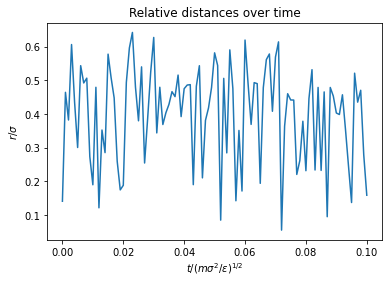

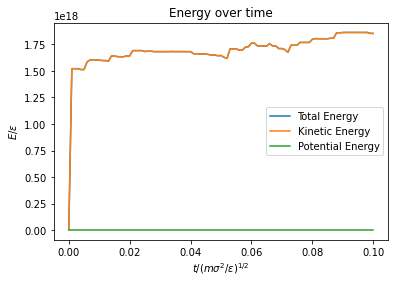

In [10]:
#Create a 2x8 matrix to store the velocity of each particle at each step in time.
next_step_velocity = np.copy(init_vel)

#Create a 2x8 matrix to store the position of each particle at each step in time.
next_step_position = np.copy(init_pos)

final_vector_kin = np.array([kin_en(init_vel, n)])
final_vector_pot = np.array([pot_en(final_matrix_pos, n)])
final_vector_energy = np.array([kin_en(init_vel, n) + pot_en(final_matrix_pos, n)])

final_rel_dist = atomic_distances(init_pos)

for i in range(number_of_steps):
    next_step_position, next_step_velocity = euler(final_matrix_pos, final_matrix_vel)
    for k in range(n): #implement boundary conditions
        for j in range(n):
            next_step_position[k, j] = next_step_position[k, j]% L
    final_matrix_pos =  np.concatenate((final_matrix_pos, next_step_position), axis=1, out=None)
    final_matrix_vel =  np.concatenate((final_matrix_vel, next_step_velocity), axis=1, out=None)
    final_vector_kin = np.concatenate((final_vector_kin, np.array([kin_en(next_step_velocity, n)])), axis = 0, out = None)
    final_vector_pot = np.concatenate((final_vector_pot, np.array([pot_en(final_matrix_pos, n)])), axis=0, out=None)
    final_vector_energy = np.concatenate((final_vector_energy, np.array([kin_en(next_step_velocity, n) + pot_en(final_matrix_pos, n)])), axis=0, out=None)
    final_rel_dist = np.concatenate((final_rel_dist, atomic_distances(next_step_position)), axis = 1, out = None)

# print("Positions:\n" , final_matrix_pos)
# print("Velocities:\n" , final_matrix_vel)
# print("Energy:\n" , final_vector_energy)
print(final_vector_kin)
print(final_vector_pot)


plt.plot(times,final_rel_dist[0, 1::2, ])
plt.title("Relative distances over time")
plt.xlabel("$t/(m\sigma^2/\epsilon)^{1/2}$")
plt.ylabel("$r/\sigma$")
plt.show()

plt.plot(times, final_vector_energy)
plt.plot(times, final_vector_kin)
plt.plot(times, final_vector_pot)
plt.legend(["Total Energy", "Kinetic Energy", "Potential Energy"])
plt.title("Energy over time")
plt.xlabel("$t/(m\sigma^2/\epsilon)^{1/2}$")
plt.ylabel("$E/\epsilon$")
plt.show()